In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.7.0


In [3]:
# For Notebooks
init_notebook_mode(connected=True)

In [4]:
# For offline use
cf.go_offline()

In [5]:
df = pd.read_excel('GMLA.xlsx', sheet_name='GMLAL Status Summary- 2022 New')

In [6]:
df = df.iloc[:,5:10]

In [7]:
df.rename(columns={"Build Close Meeting \nTarget Date\n---GMLA Start---\n(Default)": "Target date", 
                   "Build Close Meeting \nActual Date\n---GMLA Start---\n(MPM Maintain)": "Actual date",
                   df.columns[3]: "GMLA start date"}, inplace=True)

In [8]:
df.head()

,GMLA Phase,Target date,Actual date,GMLA start date,DPQE
0,GMLA1,2020-10-19,2019-07-31 00:00:00,2019-07-31 00:00:00,Jason Hsu
1,GMLA1,NaT,2019-08-13 00:00:00,2019-08-13 00:00:00,Abner Tsai
2,GMLA1,2019-08-19,NaN,2019-08-19 00:00:00,Arthur Yu
3,GMLA1,2020-01-29,2019-12-10 00:00:00,2019-12-10 00:00:00,Ernest Fu
4,GMLA2,2019-12-27,2019-12-13 00:00:00,2019-12-13 00:00:00,Chris Kuo


In [9]:
df = df[['GMLA Phase','Target date','DPQE']]

In [10]:
df = df[df['Target date'].notnull()]

In [11]:
df = df[df['Target date']>'2022-01-01']

In [12]:
df

,GMLA Phase,Target date,DPQE
275,GMLA1,2022-03-09,Jason Hsu
277,GMLA2,2022-05-31,Jason Hsu
281,GMLA3,2022-08-08,Jason Hsu
288,GMLA2,2022-01-14,Wendy Ni
293,GMLA2,2022-01-14,Wendy Ni
...,...,...,...
501,GMLA2,2022-11-17,Ernest Fu
502,GMLA3,2023-02-09,Ernest Fu
504,GMLA2,2023-02-08,Chris Kuo
505,GMLA3,2023-04-12,Chris Kuo


In [13]:
df = df.set_index('Target date')

In [14]:
df

,GMLA Phase,DPQE
Target date,,
2022-03-09,GMLA1,Jason Hsu
2022-05-31,GMLA2,Jason Hsu
2022-08-08,GMLA3,Jason Hsu
2022-01-14,GMLA2,Wendy Ni
2022-01-14,GMLA2,Wendy Ni
...,...,...
2022-11-17,GMLA2,Ernest Fu
2023-02-09,GMLA3,Ernest Fu
2023-02-08,GMLA2,Chris Kuo


In [15]:
df['DPQE'].unique()

array(['Jason Hsu', 'Wendy Ni', 'Chris Kuo', 'Cooper Wang',
       'Not assigned yet', 'Ernest Fu', 'Simon Ko', 'Aalto Lo', 'Ray Hu',
       'Cherry Tsai', 'Ernest Fu/ Aalto Lo'], dtype=object)

In [16]:
t1_dpqe = ['Cooper Wang', 'Ernest Fu','Aalto Lo', 'Ernest Fu/ Aalto Lo', 'Cooper Wang/ Wendy Ni']
aoem_dpqe = ['Simon Ko','Ray Hu','Cherry Tsai']

In [17]:
df_aoem = df[df['DPQE'].isin(aoem_dpqe)]
df_consumer = df[~df['DPQE'].isin(aoem_dpqe)]

In [18]:
#df_t1 = df[df['DPQE'].isin(t1_dpqe)]
#df_t3 = df[~df['DPQE'].isin(t1_dpqe)]

In [19]:
# AOEM DPQE

In [20]:
df_aoem = df_aoem.groupby('DPQE').resample(rule='m').count()

In [21]:
df_aoem.unstack()['GMLA Phase'].transpose().iplot(kind='area')

<AxesSubplot:xlabel='Target date'>

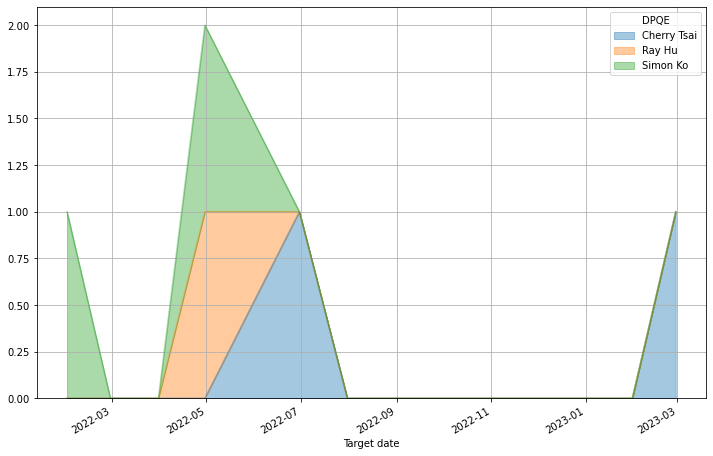

In [22]:
df_aoem.unstack()['GMLA Phase'].transpose().plot.area(alpha=0.4,figsize=(12,8), grid=True)

In [23]:
# Consumer DPQE

In [24]:
df_consumer = df_consumer.groupby('DPQE').resample(rule='m').count()

In [25]:
df_consumer.unstack()['GMLA Phase'].transpose().iplot(kind='area')

<AxesSubplot:xlabel='Target date'>

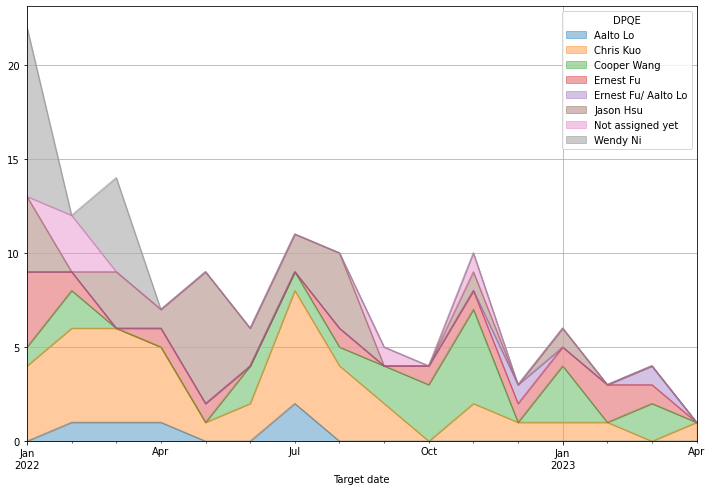

In [26]:
df_consumer.unstack()['GMLA Phase'].transpose().plot.area(alpha=0.4,figsize=(12,8), grid=True)